Price Prediction of USed Cars

Steps->

1. Import libraries
2. Import Dataset
3. Perform Data Analysis & EDA
4. Splliting the data set
5. [Optional] Data Preprocessing - Feature Scaling... etc.
6. Choosing the Model- Decision tree Regressor
7. Split and Train the model
8. Testing the Model
9. Checking the Performance of the Model

1. Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error

2. Importing the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

3. Data Analysis And EDA

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.tail

<bound method NDFrame.tail of                                      name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission        

In [5]:
df.ndim

2

In [6]:
df.shape

(4340, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [10]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [11]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [12]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

Create a column new_fuel
Replace the values:
petrol - 0
Diesel - 1
CNG - 2
LPG - 3
Electric - 4 

In [ ]:
x = df.fuel.replace({'Petrol': 0, 'Diesel': 1, 'CNG':2, 'LPG':3, 'Electric':4})
df.insert(df.columns.get_loc("fuel"),"new_fuel",x)

# df.rename(columns={'fuel': 'new_fuel'}, inplace=True)
# df['new_fuel'] = df['new_fuel'].replace({'Petrol': 0, 'Diesel': 1, 'CNG':2, 'LPG':3, 'Electric':4})

C:\Users\Vipul\AppData\Local\Temp\ipykernel_12400\611362440.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = df.fuel.replace({'Petrol': 0, 'Diesel': 1, 'CNG':2, 'LPG':3, 'Electric':4})


In [16]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner


Create a column new_seller_type
Replace the values:
'Individual' :0 
'Dealer':1
'Trustmark Dealer':2

In [17]:
x = df.seller_type.replace({'Individual' :0, 'Dealer':1, 'Trustmark Dealer':2})
df.insert(df.columns.get_loc("seller_type"),"new_seller_type",x)
df.head()

# df.rename(columns={'seller_type': 'new_seller_type'}, inplace=True)
# df['new_seller_type'] = df['new_seller_type'].replace({'Individual' :0, 'Dealer':1, 'Trustmark Dealer':2})

C:\Users\Vipul\AppData\Local\Temp\ipykernel_12400\35154140.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = df.seller_type.replace({'Individual' :0, 'Dealer':1, 'Trustmark Dealer':2})


,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


In [24]:
new_df = df.copy()

In [25]:
new_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'new_fuel', 'fuel',
       'new_seller_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')

In [27]:
new_df = new_df[['fuel','seller_type']]

In [28]:
new_df.head()

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual


In [29]:
type(new_df)

pandas.core.frame.DataFrame

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
new_df['fuel'] = LabelEncoder().fit_transform(new_df['fuel'])

C:\Users\Vipul\AppData\Local\Temp\ipykernel_12400\2736096863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['fuel'] = LabelEncoder().fit_transform(new_df['fuel'])


In [33]:
new_df['fuel'].unique()

array([4, 1, 0, 3, 2])

In [34]:
new_df.head()

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [38]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(new_df)

OneHotEncoder(handle_unknown='ignore')

In [39]:
enc_df = pd.DataFrame(enc.fit_transform(new_df[['seller_type']]).toarray())

In [40]:
enc_df

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4335,0.0,1.0,0.0
4336,0.0,1.0,0.0
4337,0.0,1.0,0.0
4338,0.0,1.0,0.0


In [43]:
#Create a Column name No_of_year = Current_year -  year

df['no_of_year'] = 2025 - df.year

In [50]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner,no_of_year
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,1,0,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,1,0,18
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,1,0,13
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,1,0,8
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,1,2,11


In [49]:
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [ ]:
#Drop Columns - names , years
# Rename selling_price to current_selling_price
df.drop(['name','year'],axis= 1,inplace= True)
df.rename(columns={'selling_price' : 'current_selling_price'},inplace=True)

In [58]:
df.drop(['fuel','seller_type'],axis= 1,inplace= True)
df.rename(columns={'new_fuel' : 'fuel'},inplace=True)
df.rename(columns={'new_seller_type' : 'seller_type'},inplace=True)

In [59]:
df.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_year
0,60000,70000,0,0,1,0,18
1,135000,50000,0,0,1,0,18
2,600000,100000,1,0,1,0,13
3,250000,46000,0,0,1,0,8
4,450000,141000,1,0,1,2,11


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling_price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   fuel                   4340 non-null   int64
 3   seller_type            4340 non-null   int64
 4   transmission           4340 non-null   int64
 5   owner                  4340 non-null   int64
 6   no_of_year             4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [61]:
df.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_year
current_selling_price,1.000000,-0.192289,0.226883,0.240666,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,0.274760,-0.187131,0.120226,0.297115,0.419688
fuel,0.226883,0.274760,1.000000,0.011358,-0.027507,0.021907,-0.090388
seller_type,0.240666,-0.187131,0.011358,1.000000,-0.200191,-0.238281,-0.182458
transmission,-0.530205,0.120226,-0.027507,-0.200191,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,0.021907,-0.238281,0.078893,1.000000,0.414705
no_of_year,-0.413922,0.419688,-0.090388,-0.182458,0.143800,0.414705,1.000000


<Axes: >

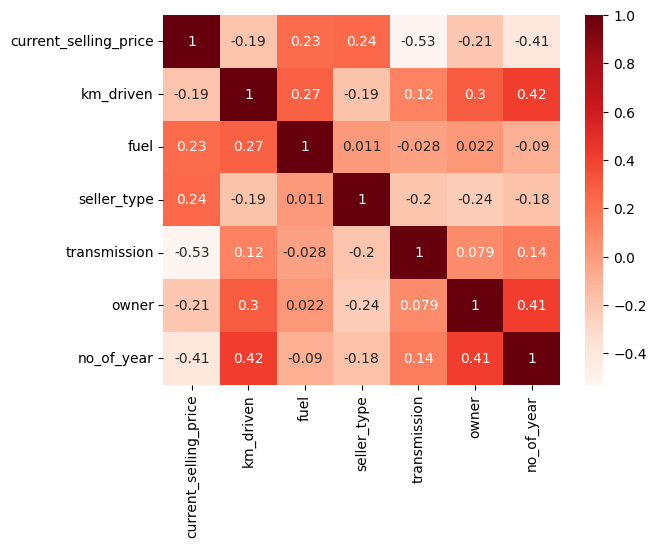

In [67]:
sns.heatmap(df.corr(), annot=True, cmap='Reds')

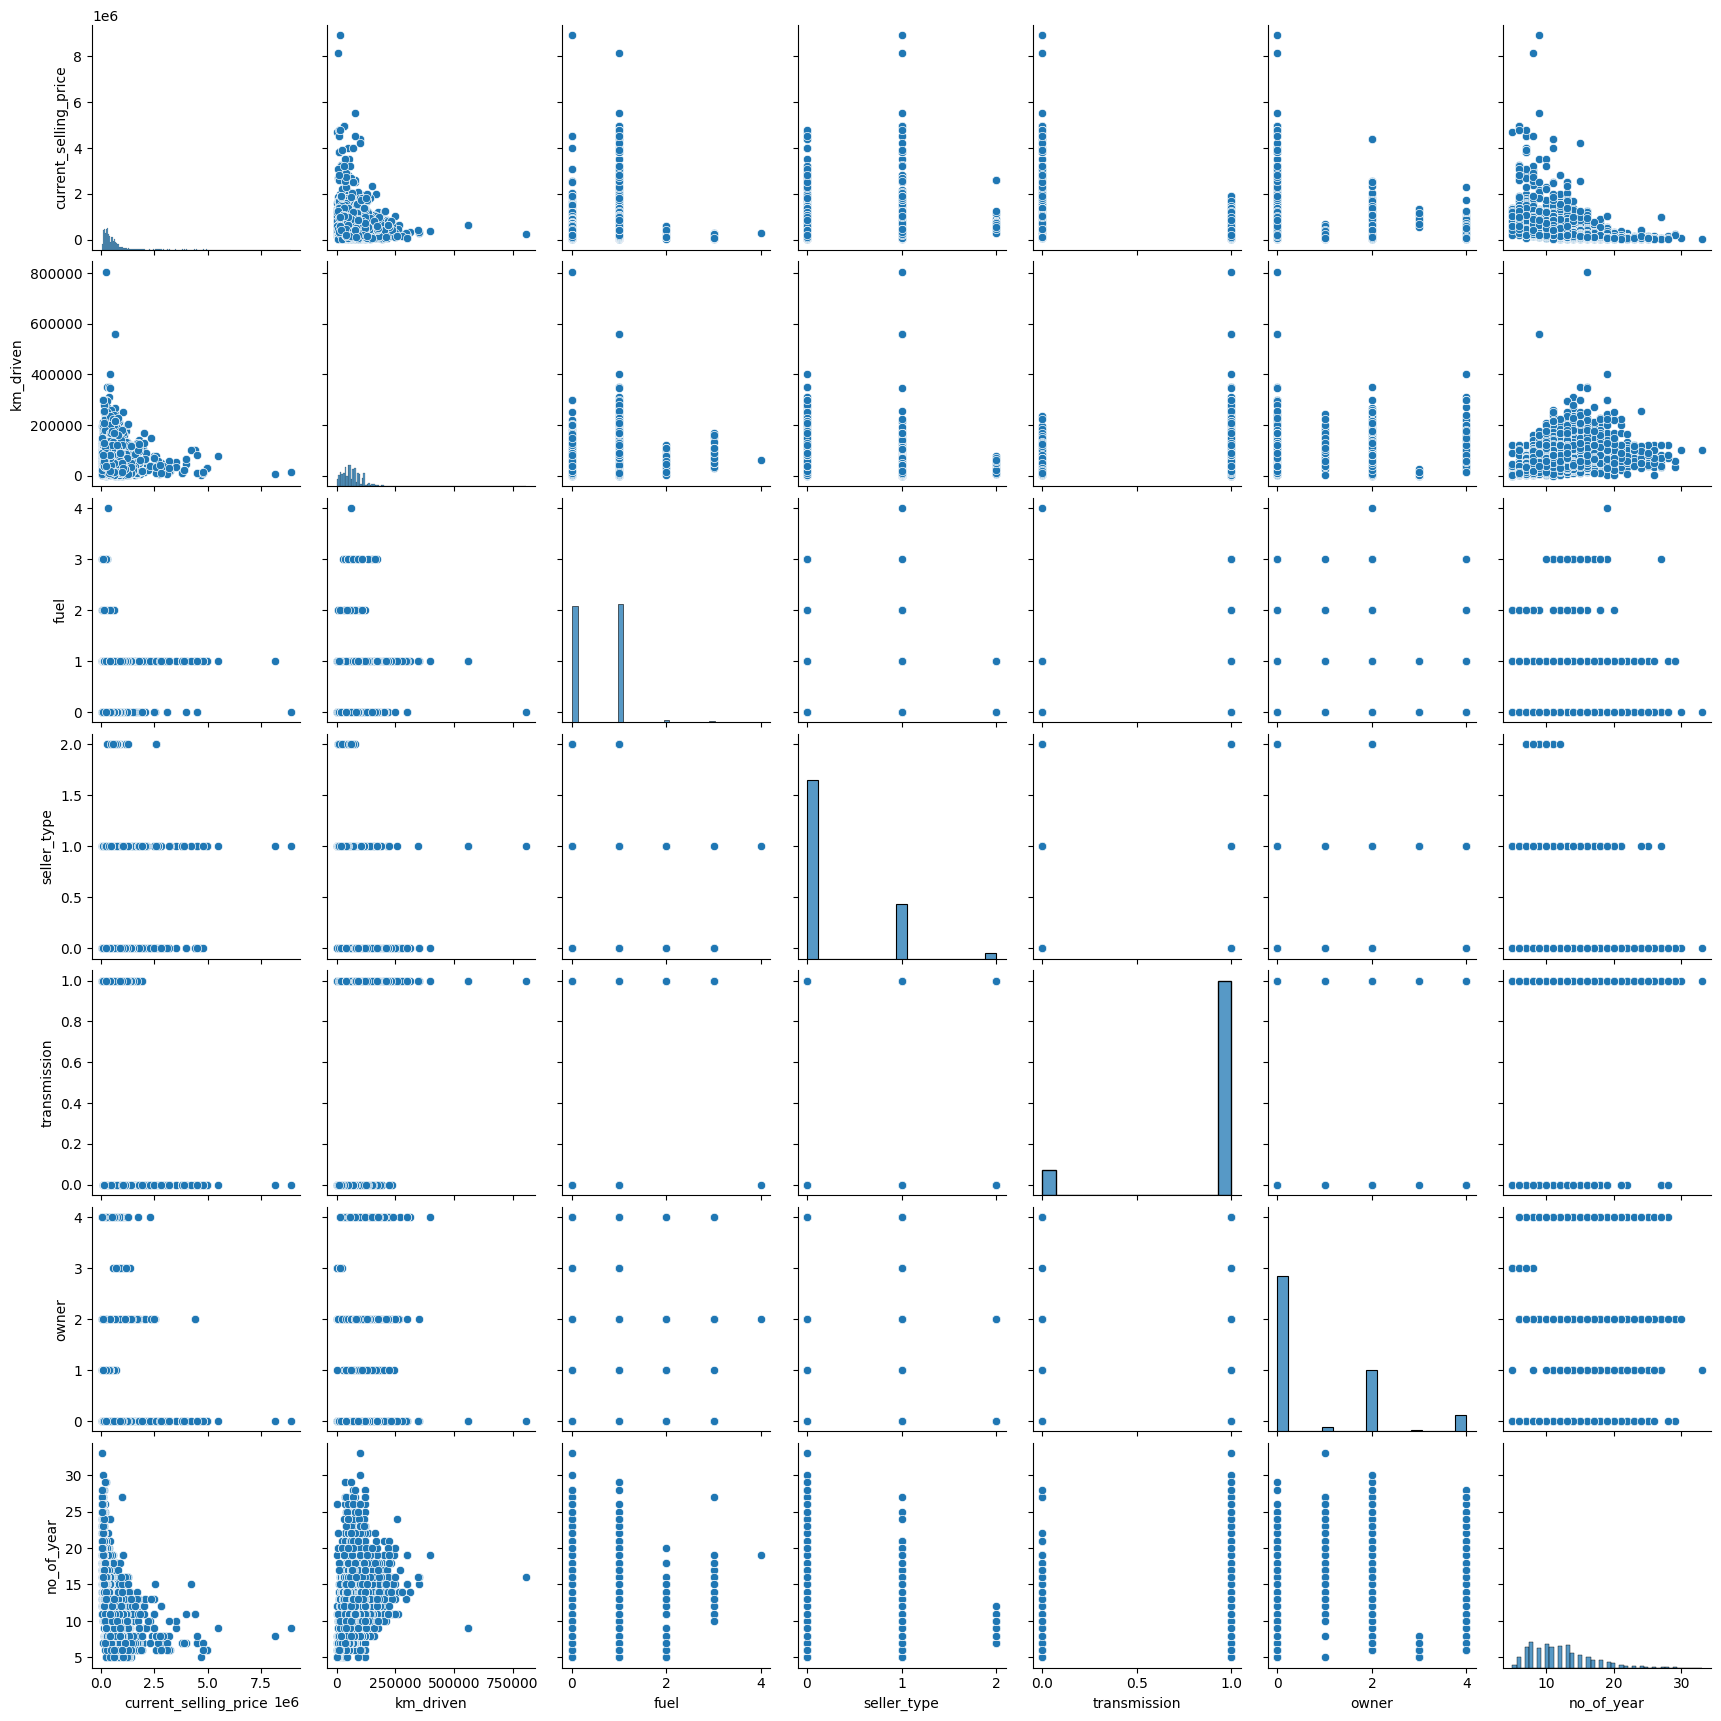

In [68]:
sns.pairplot(df)

<Axes: >

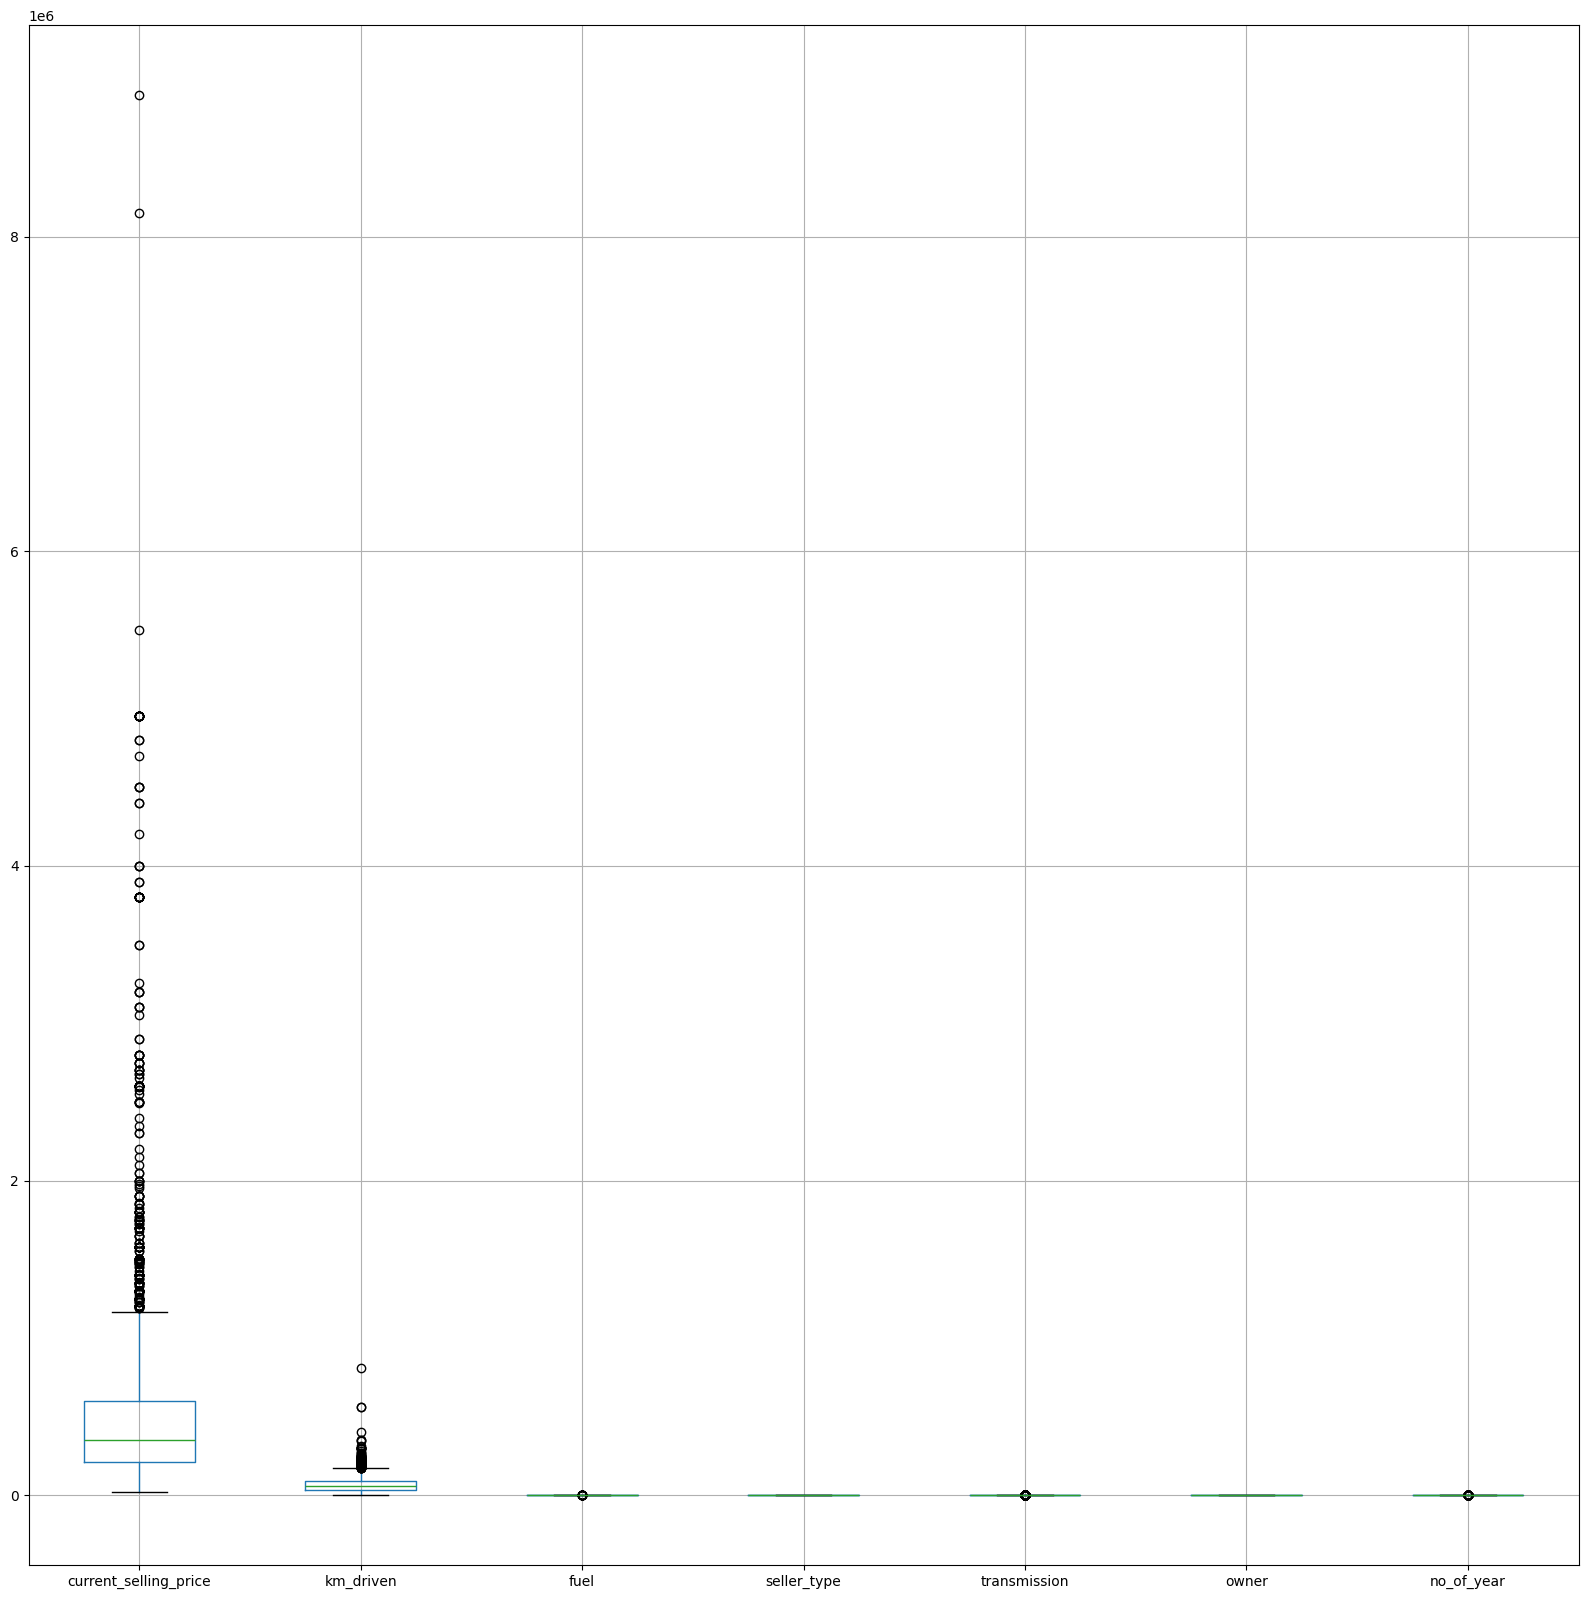

In [75]:
plt.figure(figsize=(20,20))
df.boxplot()

ML Part :
- Select The Feature and Target

In [78]:
X = np.array(df.drop('current_selling_price',axis=1))
y = np.array(df['current_selling_price'])

Split Data and Feature Selection

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
len(X_train)

3472

Choosing the model

In [81]:
regressor = DecisionTreeRegressor()

Train the Model

In [82]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

Testing the model

In [84]:
y_pred = regressor.predict(X_test)

In [85]:
target = pd.DataFrame({"Actual":y_test, "Predicted": y_pred})

In [86]:
target.head()

,Actual,Predicted
0,165000,150000.0
1,250000,280000.0
2,120000,120000.0
3,450000,450000.0
4,730000,3200000.0


Text(0.5, 1.0, 'Actual vs Predicted')

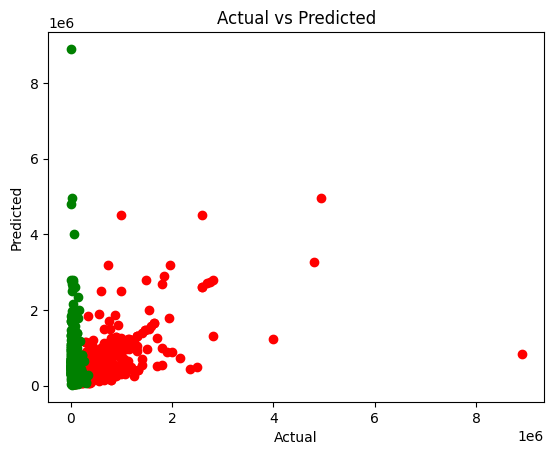

In [92]:
plt.scatter(y_test,y_pred, color = 'Red')
plt.scatter(X_test[:, 0], y_test, color='green')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

PErformance


In [93]:
r2_score(y_test,y_pred)

0.3577098906055466

In [94]:
df.to_csv('Cleaned_dataset')